In [44]:
#KNN model
#importing relevent packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


In [45]:
#obtaining the data set
dataset = pd.read_csv('Mobile_Dataset.csv')

In [46]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [47]:
#obtaining columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [48]:
#data types of variables
dataset.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [49]:
dataset.shape

(2000, 21)

In [50]:
#check whether there are null values
pd.isnull(dataset).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [51]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [52]:
yval = dataset['price_range']
xval = dataset.drop('price_range', axis = 1)

In [53]:
yval.unique()

array([1, 2, 3, 0], dtype=int64)

In [150]:
xtrain, xvalid, ytrain, yvalid = train_test_split(xval, yval, test_size = 0.2, random_state = 102, stratify = yval)

In [164]:
print(xtrain.shape)
print(xvalid.shape)

(1600, 20)
(400, 20)


In [165]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [166]:
ypredict = model_knn.predict(xvalid) 

In [167]:
print(metrics.confusion_matrix(yvalid, ypredict))

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [168]:
print(accuracy_score(yvalid, ypredict)) 

0.9375


In [169]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(xtrain, ytrain)

model.best_params_

{'n_neighbors': 9}

In [170]:
#neighbor k=9
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(xtrain, ytrain) 

KNeighborsClassifier(n_neighbors=9)

In [171]:
#printing the confusion matrix
print(metrics.confusion_matrix(yvalid, ypredict)) 

[[94  6  0  0]
 [ 3 96  1  0]
 [ 0  3 92  5]
 [ 0  0  7 93]]


In [172]:
accuracyKNN = accuracy_score(yvalid, ypredict)

In [173]:
accuracyKNN


0.9375

In [199]:
#multi layered neural network
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np 

In [200]:
#import the data set
dataf = pd.read_csv('Mobile_Dataset.csv')

In [201]:
dataf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [202]:
data = dataf.values

In [203]:
data

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [204]:
X = data[:,0:20]

In [205]:
Y = data[:,20]

In [220]:
minmax_scaler = preprocessing.MinMaxScaler()
Xscale = minmax_scaler.fit_transform(X)

In [221]:
Xscale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [208]:
Y = dataf['price_range']

In [209]:
Xtrain, Xval_and_test, Ytrain, Yval_and_test = train_test_split(X_scale, Y, test_size=0.3 , random_state=42)

In [210]:
Xval_and_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.03607214, 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.36539746, 1.        , 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.3740815 , 1.        , 0.64      , ..., 1.        , 1.        ,
        0.        ]])

In [211]:
Xval, X_test, Yval, Y_test = train_test_split(Xval_and_test, Yval_and_test, test_size=0.5)

In [212]:
print(Xtrain.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1400, 20) (300, 20) (300, 20) (1400,) (300,) (300,)


In [213]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(32, activation="relu", input_shape=(20,)),
    
 Dense(32,activation='relu'),
    
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
    
   metrics="accuracy")

In [214]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
44/44 [==============================] - 1s 2ms/step - loss: 1.3867 - accuracy: 0.2764
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3439 - accuracy: 0.3514
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.2872 - accuracy: 0.4171
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 1.1678 - accuracy: 0.5043
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.0121 - accuracy: 0.5886
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.8653 - accuracy: 0.6650
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7467 - accuracy: 0.7321
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.7750
Epoch 9/100
44/44 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.8150
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.8193
Epoch 11/

In [223]:
model.evaluate(X_test, Y_test)[1]

10/10 [==============================] - 0s 4ms/step - loss: 0.1231 - accuracy: 0.9500


0.949999988079071

In [216]:
def predictionrelease(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [217]:
preds_test = model.predict(X_test)      
test_preds = predictionrelease(preds_test)

10/10 [==============================] - 0s 4ms/step


In [218]:
#cross validation method
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,test_preds)) 


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.93      0.94      0.93        81
           2       0.92      0.92      0.92        72
           3       0.99      0.96      0.97        74

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [219]:
import matplotlib.pyplot as plt

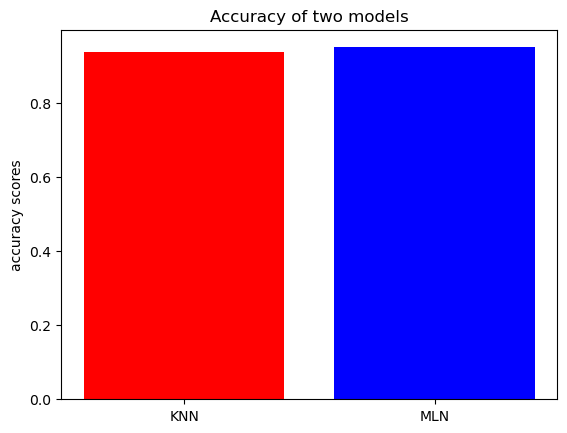

In [222]:
#compare two models and show them in a graph
models = ['KNN','MLN']
acc_scores = [0.9375,0.9499]

plt.bar(models,acc_scores,color=['red','blue'])
plt.ylabel("accuracy scores")
plt.title("Accuracy of two models")
plt.show()
